In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Define column names
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [5]:
# Load the .data file
data = pd.read_csv('Documents/Masters/ML/processed.cleveland.data', names=column_names)

In [7]:
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [9]:
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


## Inference:

The dataset contains 303 entries and 14 columns
The non-null count says there are no missing values in any of the columns
11 columns (e.g., age, blood pressure, cholesterol) are numeric and suitable for analysis.
The target column is an integer, indicating it’s likely binary (0 or 1) for heart disease classification.
The columns ca and thal are of object type, which may require conversion to numeric types for modeling.



## Understanding Target Variable

In [13]:
# Check unique values in the target variable
unique_targets = data['target'].unique()
print("Unique values in the target variable:", unique_targets)

# Count occurrences of each target value
target_counts = data['target'].value_counts()
print("Counts of each target value:\n", target_counts)

Unique values in the target variable: [0 2 1 3 4]
Counts of each target value:
 target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


### Here, we see there are 5 unique target variables and we can understand from data that 0 acts as no heart disease 4 as Very severe heart disease. Hence, I am adding mapping to numeric values to their corresponding meanings as a new column

In [16]:
# Define a mapping for target variable
target_mapping = {
    0: "No heart disease",
    1: "Mild heart disease",
    2: "Moderate heart disease",
    3: "Severe heart disease",
    4: "Very severe heart disease"
}

# Create a new column to reflect the mapping
data['target_description'] = data['target'].map(target_mapping)

# Display the value counts with descriptions
target_counts = data['target_description'].value_counts()
print(target_counts)

target_description
No heart disease             164
Mild heart disease            55
Moderate heart disease        36
Severe heart disease          35
Very severe heart disease     13
Name: count, dtype: int64


C:\Users\Sai Prashanth\AppData\Local\Temp\ipykernel_21176\37517618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_description', data=data, palette='viridis')


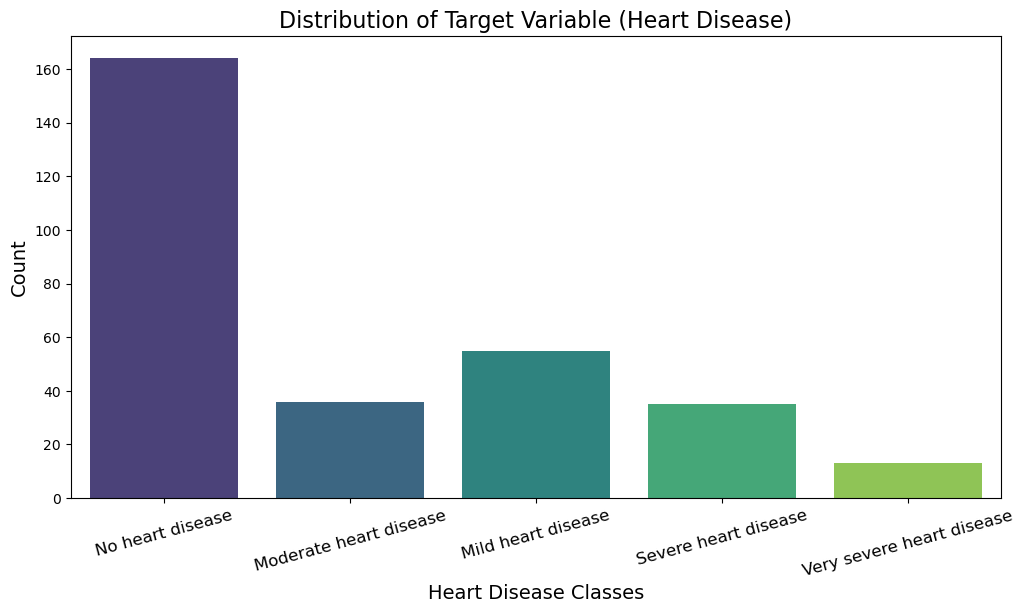

In [18]:
# Visualize target variable distribution
plt.figure(figsize=(12, 6))  # Increased size
sns.countplot(x='target_description', data=data, palette='viridis')
plt.title("Distribution of Target Variable (Heart Disease)", fontsize=16)
plt.xlabel("Heart Disease Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=15, fontsize=12)  # Rotate x labels
plt.show()

# Pre-Processing

### pre-processing involves :
###### Encoding Categorical Variables: Convert any categorical data to numerical format.
###### Splitting the Data: Separate the features and the target variable.
###### Train-Test Split: Divide the data into training and testing sets.

### Encoding:

From data.info we see 'ca' and 'thal' as object. From the data model provided on Kaggle.
The ca (number of major vessels) and thal (thalassemia) columns in the dataset are categorical because they represent discrete categories rather than continuous numeric values.


These categorical variables need to be encoded for most machine learning algorithms to process them effectively


In [20]:
# Step 2.1: Encoding Categorical Variables
# Encode 'ca' and 'thal' columns
label_encoder = LabelEncoder()
data['ca'] = label_encoder.fit_transform(data['ca'])
data['thal'] = label_encoder.fit_transform(data['thal'])

In [22]:
# Step 2.2: Separating features and target variable
X = data.drop(columns=['target', 'target_description'])  # Features
y = data['target']  # Target variable

In [24]:
# Step 2.3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (242, 13)
Testing features shape: (61, 13)
Training target shape: (242,)
Testing target shape: (61,)


# Model Selection and Training

I am going to use Logistic Regression and Decision Tree for my analysis

Justification for Algorithm Selection
Logistic Regression: This model is appropriate due to its simplicity and effectiveness for binary and multi-class classification tasks, particularly when the relationships between features and the target are assumed to be linear. Given the heart disease dataset, it can provide interpretable coefficients, helping understand feature importance.

Decision Tree: Chosen for its capability to handle non-linear relationships and interactions between features without requiring scaling. It also provides a clear visual representation of decision rules, making it suitable for medical data where interpretability is crucial.

## Logistic Regression

In [36]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))

Logistic Regression Performance:
[[24  7  1  0  1]
 [ 5  5  1  0  0]
 [ 2  1  1  3  0]
 [ 0  0  3  3  1]
 [ 0  1  0  2  0]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.36      0.45      0.40        11
           2       0.17      0.14      0.15         7
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.33      0.35      0.34        61
weighted avg       0.55      0.54      0.54        61

Accuracy: 0.5409836065573771


C:\Users\Sai Prashanth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance Analysis of Logistic Regression

##### With a skewed dependent variable (multi-class with imbalanced classes), evaluating the confusion matrix is essential. It provides a detailed view of how well the model performs across all classes rather than relying solely on overall accuracy
Confusion Matrix:

The matrix shows the counts of true and false predictions for each class. Class 0 has the highest correct predictions, while class 4 has none.

##### Understanding the balance between precision and recall is crucial, especially in medical diagnostics. High precision in class 0 shows reliable identification, but low precision and recall in other classes highlight the need for model improvement.
Precision and Recall:

Class 0 has good precision (0.77) and recall (0.73), indicating strong performance. Classes 1 and 3 are moderate, while classes 2 and 4 struggle, with class 4 showing no correct predictions.

Overall Accuracy:

The accuracy of 54.1% suggests the model is performing moderately but could benefit from improvements.


In [45]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate Decision Tree model
print("\nDecision Tree Performance:")
print(confusion_matrix(y_test, decision_tree_predictions))
print(classification_report(y_test, decision_tree_predictions))
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))


Decision Tree Performance:
[[23  6  3  1  0]
 [ 5  2  3  1  0]
 [ 0  3  1  2  1]
 [ 2  3  2  0  0]
 [ 0  0  1  1  1]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.14      0.18      0.16        11
           2       0.10      0.14      0.12         7
           3       0.00      0.00      0.00         7
           4       0.50      0.33      0.40         3

    accuracy                           0.44        61
   macro avg       0.30      0.27      0.28        61
weighted avg       0.48      0.44      0.46        61

Accuracy: 0.4426229508196721


### Decision Tree Performance Analysis

Confusion Matrix:

The confusion matrix indicates how the model predicted each class. For example, for class 0, the model correctly identified 23 instances but confused 6 with class 1 and others. Class 4 has the lowest support, indicating a challenge in predicting that class.

Class Imbalance: The confusion matrix highlights that the dataset is imbalanced, with significantly more instances of class 0 than the others. This can lead to a model that performs well on majority classes but poorly on minority classes.

Precision and Recall:

Class 0 has decent precision (0.77) and recall (0.70), showing the model performs well in identifying non-heart disease cases.
Classes 1, 2, and 3 show low performance, particularly class 3, which has zero recall.

Overall Accuracy:

The overall accuracy is approximately 44%, indicating the model is not performing well overall, especially given the multi-class nature of the target variable.